In [158]:
%matplotlib inline
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np

In [159]:
churn_data = pd.read_csv('data\churn.csv')
churn_data = churn_data.drop(['RowNumber'],axis=1)
churn_df_copy=churn_data.copy()
churn_df_copy['Exited']=churn_df_copy['Exited'].apply(lambda x: 'exited' if x ==1 else 'loyal')

In [160]:
fig_1 = px.pie(
    data_frame=churn_df_copy,
    names = 'Exited',
    title = 'Соотношение ушедших  и оставшихся клиентов'
)
fig_1.show()

По графику можно сделать вывод, что банк потерял 20.4% клиентов

In [161]:
more_that_2500 = churn_data[churn_data['Balance']>2500]
fig_2 = px.histogram(
    data_frame=more_that_2500,
    x = 'Balance',
    nbins=20,
    title = 'Распределение баланса пользователей, у которых на счету больше 2 500 долларов'
)
fig_2.show()

По графику можно сделать вывод, что большая часть клиентов хранит в банке от 60000-180000

In [162]:
fig_3 = px.box(
    data_frame=churn_df_copy,x = 'Balance', color ='Exited',title = 'Распределение баланса клиента в разрезе признака оттока')
fig_3.show()

У текущих клиентов много пустых счетов. Возможно в ближайшее время  владельцы закроют счета. У ушедших клиентов медианное значение выше, чем у текущих. Максимальное значение тоже выше. Вероятно банк изменил процентную ставку, что повлекло отток клиентов в другой банк для получения более выгодных условий.

In [163]:
fig_4 = px.box(
    data_frame=churn_df_copy,x = 'Age', color ='Exited',title = 'Распределение возраста в разрезе признака оттока')
fig_4.show()

У текущих клиентов выбросов больше при возрасте >56. Банку стоит обратить внимание на клиентов возрастом от 38 до 51 для сокращения оттока.


Text(0.5, 1.0, 'График распределения кредитного рейтинга относительно ожидаемой зарплаты')

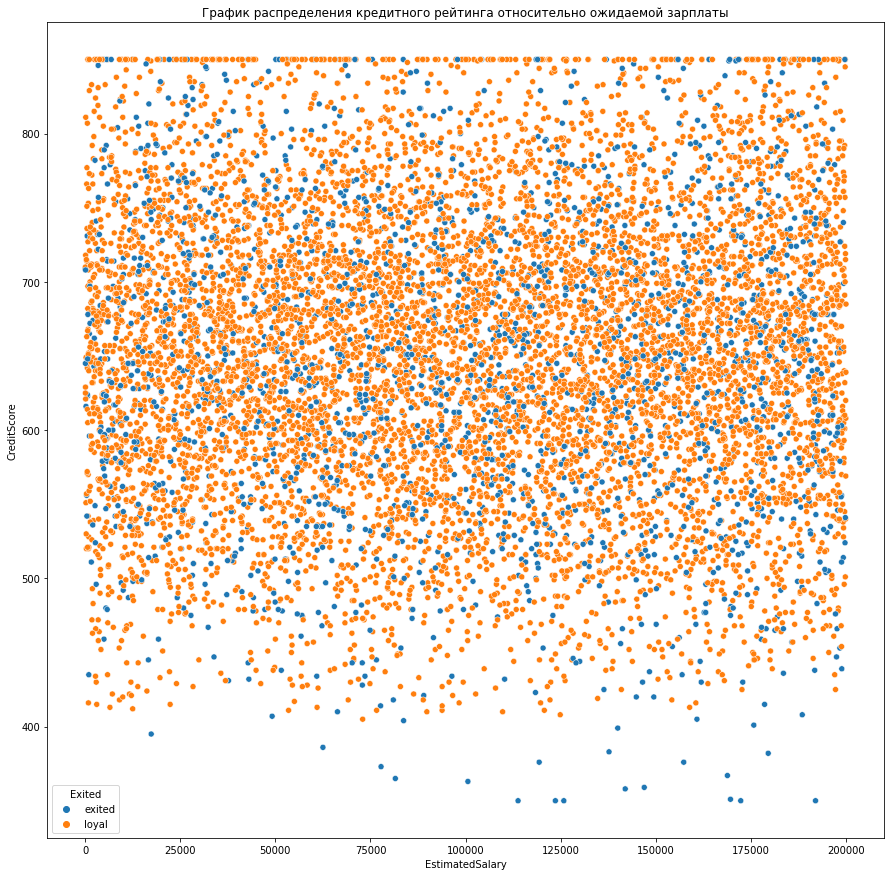

In [164]:
fig_5 = plt.figure(figsize=(15,15))
sc_plt = sns.scatterplot(x=churn_df_copy['EstimatedSalary'],y=churn_df_copy['CreditScore'],hue=churn_df_copy['Exited'],sizes=1)
sc_plt.set_title('График распределения кредитного рейтинга относительно ожидаемой зарплаты')

По графику можно сделать вывод, что основное число клиентов имеют кредитный рейтинг 550-750. Предполагаемая зарплата не влияет на кредитный рейтинг.
Наихудший к.р <400 имеют только ушедшие клиенты(вероятно в этом причина ухода). К.р>800 имеют преимуществеено текущие клиенты. 

In [165]:
gender_exited = churn_data.groupby(('Gender')).mean().apply(lambda x : x*100)
fig_6 = px.bar(gender_exited,'Exited',title = 'График ушедших по гендерной принадлежности')
fig_6.show()

1/4 клиенток банка отказались от услуг. Мужчин коснулось меньше 16%. Возможно банку стоит ввести дополнительные программы лояльности в наиболее востребованых категориях для женщин 

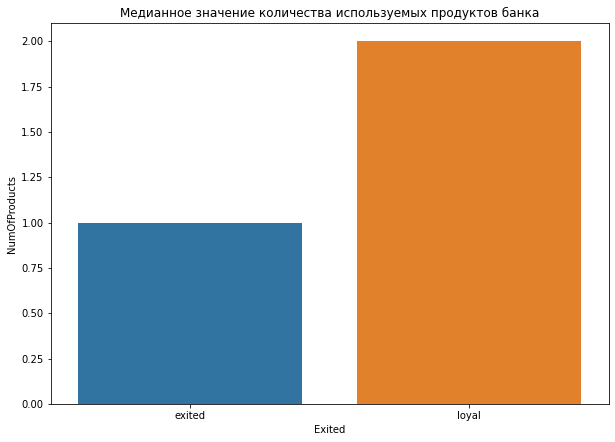

In [166]:
fig_7 = plt.figure(figsize=(10, 7))
barplot = sns.barplot(
    data = churn_df_copy,
    x='Exited',
    y='NumOfProducts',
    estimator=np.median
)
barplot.set_title('Медианное значение количества используемых продуктов банка');

In [167]:
churn_df_copy['IsActiveMember']=churn_df_copy['IsActiveMember'].apply(lambda x: 'active' if x ==1 else 'not active')
activ = churn_df_copy.groupby(['IsActiveMember', 'Exited'], as_index=False).count()
px.bar(
    data_frame=activ,
    x='IsActiveMember',
    y='CustomerId',
    color='Exited',
    height=400,
    width=600,
    title='Статус активных клиентов'
)

Неактивные клиенты уходят чаще, чем активные. Со стороны банка ввести хорошие условия для вкладов, было бы грамотным решением

In [168]:
cnry_exited = churn_data.groupby(by='Geography',as_index=False).mean().apply(lambda x:x*100)
cnry_exited['Exited'] = cnry_exited['Exited'].astype('string')

fig_9 = px.choropleth(
    data_frame=cnry_exited, 
    locations="Geography", 
    locationmode = "country names", 
    color="Exited", 
    title='Отток клиентов по странам', 
    width=800, 
    height=500, 
)

fig_9.show()

Основной отток клиентов из Германии. Вероятно, есть политические причины оттока клиентов.

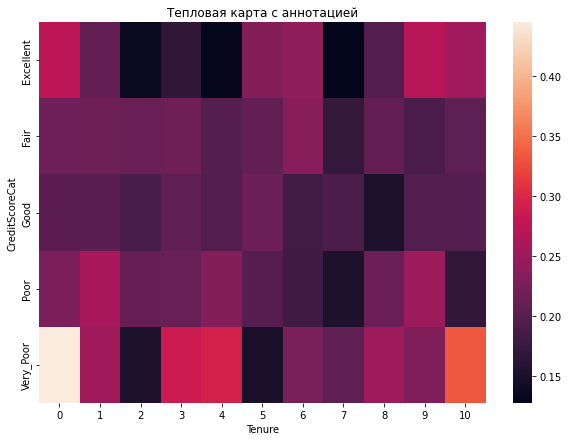

In [169]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat']=churn_data['CreditScore'].apply(get_credit_score_cat)
last_quest = churn_data.pivot_table(
            values='Exited',
            index='CreditScoreCat',
            columns='Tenure',
            aggfunc='mean',
)
fig_10 = plt.figure(figsize=(10, 7))
hm = sns.heatmap(
    last_quest
)
hm.set_title('Тепловая карта с аннотацией');

Быстрее всех уходят новые клиенты с плохим кредитным рейтингом. Далее идут клиенты с плохим кредитным рейтингом, которые обслуживаются банком 10 лет. И замыкают клиенты с плохим кредитным рейтингом, которые обслуживаются 3-4 года.